Check / Run the following `from utils.scripts.dev_experiments import parametrized_surfaces`
for a demo of the four surfaces.


1. lp - paramters - locations drawn from parameter space - a, b in [0, 1]
2. lr - locations from surface corresppoding to lp / ab

In [1]:
from utils.gradient_walk_utils import *

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
targets_array = (np.vstack((vis_df["f_xyz"]))).tolist()
    
_, info_dict = initialize_trained_encoder()
norm_params     = (info_dict["xyz_centroid"], info_dict["xyz_max-min"], info_dict["xyzh_centroid"], info_dict["xyzh_max-min"])

print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())
print("Targets mins and maxs:", np.min(targets_array, axis=0).round(), np.max(targets_array, axis=0).round())

norm_params

Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]
Targets mins and maxs: [-1. -1. -1. -1.] [1. 1. 1. 1.]


(array([1406.54009895,   61.762011  , 1061.20413751]),
 3001.246931488514,
 array([ 22.43477189,  37.63691096, -15.5006524 ]),
 359.99998089890255)

# Visualization of Standard shapes above city.

# Redesign of `intialize_input_as_tensor` for suface walking

`intialize_input_as_tensor`

inputs: (a,b) - parameters of point;
(p, c, ...) - surface parameters (for plane: point on plane and point outside; for sphere: center and point on surface)
norm_params

outputs:
sample_batch <- data_loader with (a,b), (p,c) and norm_params


Implemented `EncoderNeRFSDataset` and moved to `utils.scripts.architectures.torch_nerf_src.network.nerfs.EncoderNeRFSDataset`

# Redesign of NeRF

# Query multiple locations moved to and adaption of 

the `query_locations` method from `utils.gradient_walk_utils.py`

# Square

In [2]:
#Square parameters
from utils.gradient_walk_utils import query_locations_on_surface, process_locations_visibility_data_frame, torch, np

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())

p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 50, -300])
# p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, -100, -300])
c                  = p - torch.tensor([.01, 50, .01])
r                  = torch.tensor([3500., -2500.])
# r                  = torch.tensor([3500., 2500.])
surface_basis      = (p, c, r); surface_type="square"

desired_distribution = torch.tensor([0,1,0,0]).to(torch.float32)

# al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type, num_locations=10, search_intervals=np.ones(4) * .2, lt=.01, at=10, max_steps = 100)
    

Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]


In [6]:
num_locations=10#10000
seed=2; lrate=5*1e-3
lrate = 1
al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type\
               , num_locations=num_locations, search_intervals=np.ones(4) * .5, lt=.01, lrate=lrate, max_steps = 50\
                                 , seed=seed)


Random seed set as 2
Adjusted lrate to 0.25


  9%|██████████████▎                                                                                                                                                | 9/100 [00:00<00:01, 73.22it/s]


In [13]:
ratio_surface_lrate = 2500 / (5*1e-3)

ratio_surface_lrate, 10e-5, 10**5


(500000.0, 0.0001, 100000)

In [9]:
surface_basis[2].abs().min()

tensor(2500.)

In [6]:
lrate, surface_basis

(0.005,
 (tensor([-299.5460,   60.0000, -292.3067], dtype=torch.float64),
  tensor([-299.5560,   10.0000, -292.3167], dtype=torch.float64),
  tensor([ 3500., -2500.])))

In [5]:
al_df.sort_values("residual")#.values

,x,y,z,xh,yh,zh,f_xyz,residual,steps,start_locs,start_views
7,683.431013,59.614407,654.611811,172.180905,-45.506072,174.405410,"[0.1436091, 0.27147597, 0.056812316, 0.50671595]",0.202840,50,"[468.4178786916862, 59.61028740140845, 890.242...","[172.18090493911308, -45.506071581489465, 174...."
3,967.587928,59.488887,998.683089,-179.759061,-21.488591,-179.911740,"[0.24750331, 0.0020461977, 0.19700226, 0.512081]",0.339552,50,"[1009.6863438791256, 59.484165559680164, 980.2...","[-179.75906051161584, -21.48859088907611, -179..."
0,1817.466101,59.384767,669.924299,4.651403,55.322153,-3.827867,"[0.47027674, 0.00015583634, 0.05108729, 0.4119...",0.348300,50,"[1851.6964681357192, 59.37977986876808, 660.65...","[4.651403025228793, 55.32215347809179, -3.8278..."
9,-92.130991,59.747120,765.942145,170.948641,4.058931,-179.353967,"[0.5131822, 2.9802322e-08, 0.014545888, 0.3905...",0.354024,50,"[-115.84921092284371, 59.74648304975068, 792.8...","[170.94864138448915, 4.05893055193142, -179.35..."
1,2084.451282,59.449684,78.028097,141.849687,76.097158,-142.674225,"[0.24966565, 0.0020986795, 0.0183177, 0.6396234]",0.366898,50,"[2085.142782713403, 59.46062967988153, 22.5551...","[141.8496870596135, 76.09715798174335, -142.67..."
4,1652.363682,59.506149,227.509489,0.504237,13.331760,-0.116275,"[0.66255915, 2.938509e-05, 0.037321895, 0.2800...",0.379681,50,"[1534.2439979159765, 59.52065935725601, 273.00...","[0.5042374926421115, 13.331760009483776, -0.11..."
5,624.988349,59.404872,1761.774943,168.115303,28.077021,-174.343194,"[0.5168609, 0.0, 0.0026072562, 0.5025636]",0.379931,50,"[557.7976210778988, 59.428376735151275, 1711.3...","[168.11530268312447, 28.07702117546572, -174.3..."
6,404.731512,59.361153,2200.847652,8.454487,44.470205,-5.944632,"[0.25537923, 6.467104e-06, 0.018846303, 0.6881...",0.384765,5,"[397.0508686494581, 59.36997342859962, 2164.38...","[8.454487111958258, 44.47020454675007, -5.9446..."
8,-13.075384,59.860993,116.951769,0.880825,68.672175,-0.820510,"[0.76592153, 1.1622906e-06, 0.046084464, 0.154...",0.403190,50,"[-116.39099387101257, 59.90704987570441, -10.2...","[0.8808245330075454, 68.67217529797857, -0.820..."
2,-294.561024,59.896206,222.198773,159.678867,71.789352,-160.619035,"[0.88321686, 8.940697e-08, 0.0046443343, 0.110...",0.448069,5,"[-250.88996038607567, 59.88540509149332, 232.5...","[159.6788674075439, 71.78935156593802, -160.61..."


In [41]:
# set_seed(1)
# # np.random.randint(locs_array.shape[0])
# selected_dir_id = np.random.randint(locs_array.shape[0])
# torch.tensor(locs_array[selected_dir_id][3:], requires_grad=False), selected_dir_id

vis_df[np.isclose(vis_df["xh"], -18.015063)]

,x,y,z,xh,yh,zh,f_xyz,image_name,xn,yn,zn,xhn,yhn,zhn,f_xyz_raw
22013,1188.171308,101.826521,857.988393,-18.015064,71.600458,17.149449,"[-0.07826805114746094, -0.8024654388427734, -0...",pos1834-2-visibility-70,-0.072759,0.013349,-0.06771,-0.112361,0.094343,0.090695,"[483253, 103565, 15, 1577, 3237, 60484, 396445..."


In [6]:
vis_df.x.max(axis=0), vis_df.x.min(axis=0), vis_df.z.max(axis=0), vis_df.z.min(axis=0)

(3001.7009020996093, 0.4539706110954284, 2170.659092773438, 7.693322181701668)

In [4]:
al_df.x.max(axis=0), al_df.x.min(axis=0), al_df.z.max(axis=0), al_df.z.min(axis=0)

(3092.54268551275, 23.833769621604475, 2204.5479609429385, -124.01382004643011)

In [29]:
seed          = np.random.randint(10)
al_df_test    = query_locations_on_surface(desired_distribution, surface_basis, surface_type\
       , num_locations=5, search_intervals=np.ones(4) * .5, lt=.01, lrate=5*1e-3, max_steps = 50, seed=seed)
al_df_test

Random seed set as 3


  8%|██████▉                                                                                | 4/50 [00:00<00:06,  7.13it/s]


,x,y,z,xh,yh,zh,f_xyz,residual,steps,start_locs
0,-291.890955,59.938889,5.593534,53.363154,-53.719148,47.279738,"[0.058315217, 7.748604e-07, 0.0041100383, 0.92...",0.465267,4,"[-284.6764827881592, 59.94424081720685, -28.38..."
1,1367.858216,59.180409,2138.244443,15.057304,70.006000,-14.520026,"[0.8690649, 0.00040614605, 0.0067893565, 0.132...",0.443004,50,"[1356.1828128724296, 59.181290439766144, 2145...."
2,159.111846,59.820033,148.870985,-175.389615,-44.852598,-177.152769,"[0.8335923, 8.881092e-06, 0.12012726, 0.04824391]",0.427904,50,"[152.31844750203467, 59.81967928056126, 157.43..."
3,306.163836,59.577188,1216.042931,160.051851,8.400306,-177.206512,"[0.030054867, 8.940697e-08, 0.014302403, 0.902...",0.453696,50,"[214.77466868089442, 59.61236928394557, 1131.5..."
4,2997.485310,59.259856,111.380754,4.425768,23.721638,-1.667201,"[0.08157992, 0.09314045, 0.021163613, 0.7533778]",0.349269,50,"[2980.663476452286, 59.26511816419307, 101.893..."


In [ ]:
def query_plane_locations_page():
    
    seed          = np.random.randint(10)
    si = np.ones(4) * .5# search intervals
    lt =.01
    lr = 5*1e-3
    ms = 50
    
    try:
        data                 = request.json
        query_df             = pd.DataFrame(data)
        
        p = torch.tensor([float(x) for x in query_df["point_on_plane"].values[0]]).to(torch.float32)
        c = torch.tensor([float(x) for x in query_df["point_plus_normal"].values[0]]).to(torch.float32)
        r = torch.tensor([float(x) for x in query_df["r"].values[0]]).to(torch.float32)
        
        desired_distribution = torch.tensor([float(x) for x in query_df["f_xyz"].values[0]]).to(torch.float32)
        surface_basis      = (p, c, r); surface_type         = "square"
        num_locations        = int(query_df["num_locations"].values[0])
        if "seed" in query_df:
            seed = int(query_df["seed"])
    except Exception as e:
        print(e)
        print(f"Invalid JSON sent in the request - an example of query locations file is in:")
        print("\t ./utils/assets/query_locations/query_location.json")
        return jsonify([{"":"Invalid JSON"}])


    
    
    al_df    = query_locations_on_surface(desired_distribution, surface_basis, surface_type\
       , num_locations=num_locations, search_intervals=si, lt=lt, lrate=lr, max_steps = ms, seed=seed)
    
    al_df.to_csv("./utils/assets/query_locations/query_location_square.csv", index=False)

    return al_df.to_json(orient="records", indent=4)


In [4]:
al_df.head()

,x,y,z,xh,yh,zh,f_xyz,residual,steps,start_locs
0,2331.398721,59.313060,511.446657,169.475510,-13.339927,177.407808,"[0.44988412, 1.6152859e-05, 0.023779929, 0.550...",0.376605,50,"[2352.024930413132, 59.329924358267, 406.50064..."
1,3085.236298,58.852592,2059.952772,-179.602453,-32.677798,-179.657208,"[0.14438352, 0.6819801, 0.015190393, 0.2537226]",0.046647,50,"[2938.233419205298, 58.87251946126664, 2107.31..."
2,23.833751,59.886415,-47.759209,12.961296,-6.500593,1.207512,"[0.7824905, 2.9802322e-08, 0.0068010986, 0.228...",0.416096,50,"[-13.636148441258998, 59.893613210578856, -46...."
3,1610.675223,59.351240,1041.272723,3.150878,17.458228,-1.152477,"[0.8418507, 3.1292439e-06, 0.028662175, 0.1048...",0.430129,50,"[1527.3734783116736, 59.36400624872048, 1060.7..."
4,2704.656848,58.899788,2204.548561,-1.183525,81.000447,1.169005,"[0.40823305, 0.028917253, 0.019873947, 0.4456615]",0.327166,1,"[2704.6568478181503, 58.89978840136989, 2204.5..."


In [12]:
al_df[["x", "y", "z", "residual", "steps"]].to_csv(f"./square_x_locations_test_{num_locations}.json", index=False)

In [13]:
al_df.to_csv(f"./square_locations_test_{num_locations}.json", index=False)


In [7]:
al_df["start_locs"].values

array([array([2352.02493041,   59.32992436,  406.50064593]),
       array([2938.23341921,   58.87251946, 2107.31669326]),
       array([-13.63614844,  59.89361321, -46.28259977]), ...,
       array([3059.47763897,   58.93479284, 1674.70555643]),
       array([ -96.959442  ,   59.65523165, 1228.94854496]),
       array([701.74107173,  59.68875023, 262.65509618])], dtype=object)

Text(0.5, 1.0, 'square: [-300.   60. -292.] residuals distirbution')

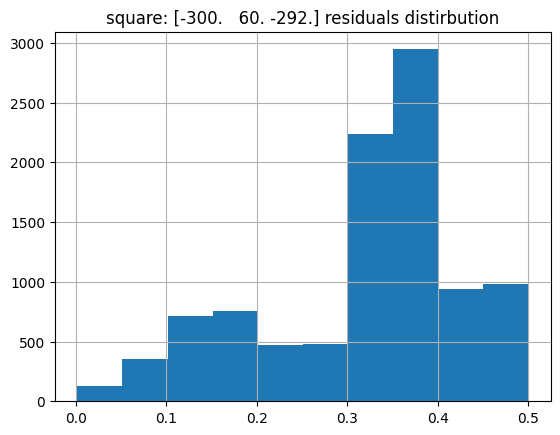

In [14]:
from utils.gradient_walk_utils import analyze_queried_locations, o3d

#Square
# geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids \
geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .3, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,-1,0], .4
# o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
# o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
# o3d.visualization.draw_geometries(geometries[2:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries

import matplotlib.pyplot as plt
al_df["residual"].hist()
plt.title(f"{surface_type}: {str(p.detach().numpy().round())} residuals distirbution")

In [30]:
geometries
o3d.visualization.draw_geometries(geometries[2:], front=f,lookat=l,up=u,zoom=1.5*z)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


Text(0.5, 1.0, 'square: [-300.   60. -292.] residuals distirbution')

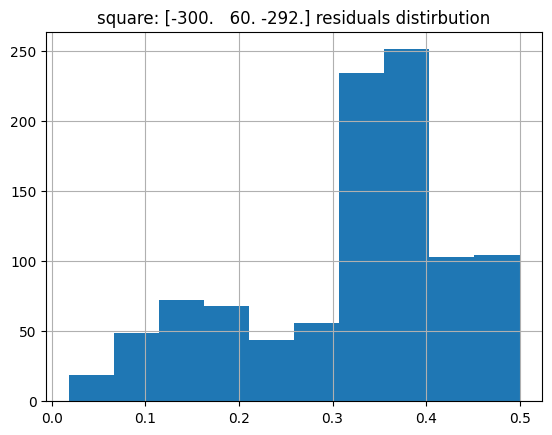

In [34]:
from utils.gradient_walk_utils import analyze_queried_locations, o3d

#Square
# geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids \
geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .3, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,-1,0], .4
# o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
o3d.visualization.draw_geometries(geometries[2:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries

import matplotlib.pyplot as plt
al_df["residual"].hist()
plt.title(f"{surface_type}: {str(p.detach().numpy().round())} residuals distirbution")

# Sphere

In [17]:
#Spehere parameters
from utils.gradient_walk_utils import query_locations_on_surface, process_locations_visibility_data_frame, torch, np

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())


height_offest = 1500
p                  = torch.tensor(locs_array.mean(axis=0)[:3]) + torch.tensor([0, height_offest, 0])
c                  = p - torch.tensor([.01, height_offest, .01])
r                  = None#torch.tensor([3500., -2500.])
surface_basis      = (p, c, r); surface_type="sphere"

desired_distribution = torch.tensor([0,1,0,0]).to(torch.float32)

# al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type, num_locations=10, search_intervals=np.ones(4) * .2, lt=.01, at=10, max_steps = 100)
    

Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]


In [24]:
si = np.ones(4) * .1
lr = 1e-4
ms = 50

al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type\
               , num_locations=1000, search_intervals=si, lt=.01, lrate=lr, max_steps = ms)
    

Random seed set as 1


 10%|████████████▊                                                                                                                   | 999/10000 [01:12<10:50, 13.84it/s]


Text(0.5, 1.0, 'sphere: [1407. 1562. 1061.] residuals distirbution\nsi:[0.1 0.1 0.1 0.1]; lr:0.0001; ms:50')

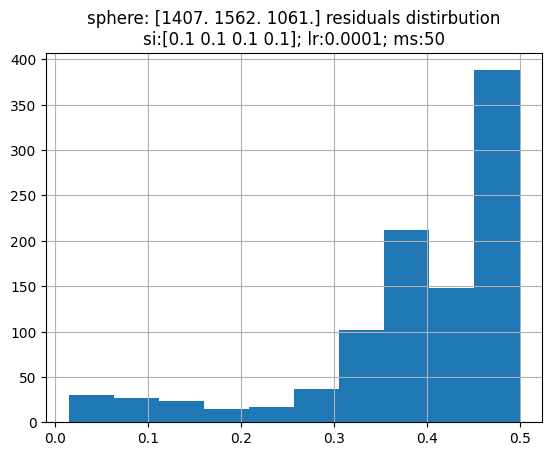

In [25]:
#sphere
geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .3, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,-1,0], .4
# o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
# o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries



import matplotlib.pyplot as plt

al_df["residual"].hist()
plt.title(f"{surface_type}: {str(p.detach().numpy().round())} residuals distirbution"+\
         f"\nsi:{si}; lr:{lr}; ms:{ms}")

# Semi Sphere

In [13]:
#Semi Sphere parameters
from utils.gradient_walk_utils import query_locations_on_surface, process_locations_visibility_data_frame, torch, np

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())


height_offest      = 1500
# p                  = torch.tensor(locs_array.mean(axis=0)[:3]) + torch.tensor([0, height_offest, 0])
p                  = torch.tensor(locs_array.mean(axis=0)[:3]) + torch.tensor([0, height_offest, 0])
c                  = p - torch.tensor([.01, height_offest, .01])
r                  = torch.tensor([.5, 1])#None#torch.tensor([3500., -2500.])
surface_basis      = (p, c, r); surface_type="semisphere"

desired_distribution = torch.tensor([0,1,0,0]).to(torch.float32)

# al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type, num_locations=10, search_intervals=np.ones(4) * .2, lt=.01, at=10, max_steps = 100)
    

Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]


In [14]:
al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type\
       , num_locations=1000, search_intervals=np.ones(4) * .5, lt=.01, lrate=10*1e-3, max_steps = 50)
    

Random seed set as 1


 10%|████████████▊                                                                                                                   | 999/10000 [01:02<09:27, 15.86it/s]


Text(0.5, 1.0, 'semisphere: [1407. 1562. 1061.] residuals distirbution')

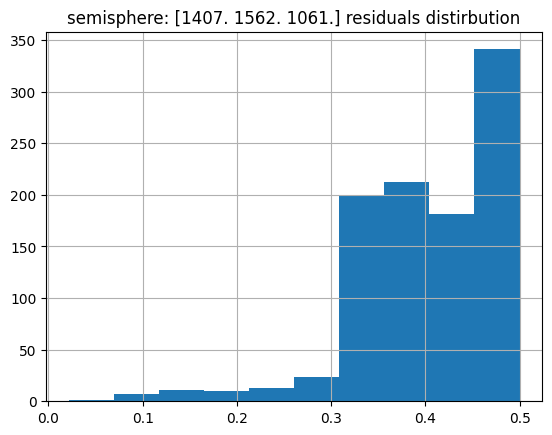

In [16]:
#sphere
from utils.gradient_walk_utils import analyze_queried_locations, o3d

# geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids \
geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .5, draw_o3d=False)
# geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .55, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,1,0], .4
# o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
# o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries



import matplotlib.pyplot as plt
al_df["residual"].hist()
plt.title(f"{surface_type}: {str(p.detach().numpy().round())} residuals distirbution")

# No constraints:

In [19]:
al_df = query_locations([0,1,0,0], 10000, lt=.5, debugging=True, max_steps=10)

 10%|████████████▊                                                                                                                   | 9999/100000 [02:53<26:01, 57.65it/s]


In [20]:
al_df["start_locs"] = al_df["start_locs"].apply(lambda l: l[:3])
np.vstack(al_df["start_locs"])

array([[ 614.66090349,  106.90975189,  222.33747405],
       [ 425.67709351,   57.31066895,  238.27900696],
       [ 128.07272649,   61.92591858,  777.8683001 ],
       ...,
       [ 425.67709351,   57.31066895,  238.27900696],
       [2913.9760022 ,   73.0384481 , 1607.96673018],
       [1486.0579043 ,   44.85497093, 1167.15239492]])

In [38]:
sns.diverging_palette(260, 5, as_cmap=False, n=5, s=60)

[(0.36204382014945136, 0.44664865598964026, 0.7797854956034019),
 (0.6567985471377976, 0.698864053178378, 0.8654949793642184),
 (0.9493716134251703, 0.9459894173976073, 0.9462461884791474),
 (0.868000881668597, 0.6176791780011968, 0.6598968275206677),
 (0.788209084547896, 0.297185896991587, 0.38061616432868334)]

In [42]:
def analyze_queried_locations(al_df=None, n_colors = 5, res_filter_threshold = .5, draw_o3d=True):
    """Invistigate queried locations Color Scene by label categories and label pallete: VIS 2024 figure 
    developed in iNeRF_adaption.ipynb"""
    vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")

    
    targets_array = ((np.vstack(vis_df["f_xyz"])+1)/2)
    locs_array    = (vis_df.values)[:,:3]
    geometries    = []
    if "start_locs" in al_df:
        start_locs   = np.vstack(al_df["start_locs"].values)
        strat_colors = np.ones_like(start_locs) * .8
        start_pcd = get_o3d_pcd_from_coordinates(start_locs, strat_colors)
        geometries.append(start_pcd)

    #start_locs    = locs_array#np.vstack(al_df["start_locs"].values)[:,:3]#np.vstack([l[0] for l in locations])[:,:3]
    #start_targets = ((np.vstack(vis_df["f_xyz"])+1)/2)#np.array([t[0] for t in targets])
    
    if al_df is not None:
        achieved_locs = al_df.values[:,:3]#np.vstack([l[1] for l in locations])[:,:3]
        mean_losses   = np.array(al_df["residual"].values)
        scaled_residuals = mean_losses #/ mean_losses.max()
        filtered_ids  = np.where(scaled_residuals<res_filter_threshold)[0] #np.where(np.array(mean_losses)<.5)[0]
        #err_pallete = sns.color_palette("coolwarm", n_colors=n_colors)# Blue to Orange
        #err_pallete = sns.diverging_palette(125, 5, as_cmap=False, n=n_colors, s=60)# Greento Red
        err_pallete = sns.diverging_palette(260, 5, as_cmap=False, n=n_colors, s=60) # Blue to Red
        loss_colors = np.array([err_pallete[::-1][int(ml*n_colors)-1] for ml in scaled_residuals])
#         loss_ids = [int(ml*n_colors-1) for ml in mean_losses - mean_losses.min()]
#         loss_colors = np.array([[err_pallete[::-1][li] for li in loss_ids]])


    ###Label colors pallete
    label_pallete        = sns.color_palette("tab10", n_colors=4) #[Buildings, Water, Trees, Sky]
    label_pallete[1]     = label_pallete[0]; label_pallete[0] = (0.549, 0.471, 0.318); label_pallete[3] = (1, 0.847, 0.012) #ffd803
    full_dominant_label  = np.argmax(targets_array > np.array(targets_array).mean(axis=0), axis=1)
    #start_dominant_label = np.argmax(start_targets > start_targets.mean(axis=0), axis=1)
    #start_label_colors = np.take(label_pallete, start_dominant_label, axis=0)
    full_locs = locs_array[:,:3][full_dominant_label!=3]
    full_label_colors  = np.take(label_pallete, full_dominant_label, axis=0)[full_dominant_label!=3]
    # full_label_colors = np.hstack([full_label_colors, np.ones((full_label_colors.shape[0], 1))*.2])

    #O3D point cloud assembly:
    # full_pcd      = get_o3d_pcd_from_coordinates(locs_array[:,:3], [0,1,0])
    full_pcd      = get_o3d_pcd_from_coordinates(full_locs, full_label_colors)
    # start_pcd     = get_o3d_pcd_from_coordinates(start_locs, [0,1,0])
    # start_pcd    = get_o3d_pcd_from_coordinates(start_locs, start_label_colors)
    geometries.append(full_pcd)# = [full_pcd]
    
    if al_df is not None:
        #adapted_pcd  = get_o3d_pcd_from_coordinates(achieved_locs, loss_colors)
        filtered_pcd = get_o3d_pcd_from_coordinates(achieved_locs[filtered_ids], loss_colors[filtered_ids])
        geometries.append(filtered_pcd)

    if draw_o3d:
        # o3d.visualization.draw_geometries([start_pcd])
        # o3d.visualization.draw_geometries([full_pcd])
        # o3d.visualization.draw_geometries([full_pcd, adapted_pcd])
        o3d.visualization.draw_geometries(geometries)

    #return geometries
    return geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids

geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_id\
= analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .95, draw_o3d=False)

In [27]:
#No constraints:
geometries = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .95, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,-1,0], .4
o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


[PointCloud with 10000 points.,
 PointCloud with 22435 points.,
 PointCloud with 10000 points.]

# Color Scene by label categories and label pallete: VIS 2024 figure

Copied from `iNeRF_adaption.ipynb`

In [ ]:
geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids \
= analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .3, draw_o3d=False)

f,l,u,z = [0,0,1], [1700,-10,1350], [0,-1,0], .4
o3d.visualization.draw_geometries(geometries, front=f,lookat=l,up=u,zoom=z)
o3d.visualization.draw_geometries(geometries[1:], front=f,lookat=l,up=u,zoom=1.5*z)
geometries

In [17]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 3200.3344484068975, 111.92591857910141, 2207.0061089261485 ],
			"boundingbox_min" : [ -298.98250404064339, -91.182808326747804, -292.21756021773371 ],
			"field_of_view" : 60.0,
			"front" : [ 0.066616892983401454, -0.048562666621585752, 0.99659613534261648 ],
			"lookat" : [ 1672.3072095293769, -11.975631938405158, 1347.280789310626 ],
			"up" : [ -0.024899493391479264, -0.99858473284934401, -0.046995175806160999 ],
			"zoom" : 0.40399999999999969
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

[PointCloud with 1000 points.,
 PointCloud with 22435 points.,
 PointCloud with 122 points.]

In [7]:
sns.diverging_palette(125, 5, as_cmap=False, n=5, s=60)
# sns.diverging_palette(260, 5, as_cmap=False, n=5, s=60) 
# sns.color_palette("coolwarm", n_colors=5)

[(0.30909560504027705, 0.5145606713101922, 0.2844928808093271),
 (0.6242340979665029, 0.7352377397989348, 0.6112772410019935),
 (0.9493716134251703, 0.9459894173976073, 0.9462461884791474),
 (0.868000881668597, 0.6176791780011968, 0.6598968275206677),
 (0.788209084547896, 0.297185896991587, 0.38061616432868334)]

In [8]:
from utils.gradient_walk_utils import analyze_queried_locations
# analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .3)

In [10]:
# achieved_locs[filtered_ids]

In [25]:
o3d.visualization.draw_geometries([geometries[1]])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [23]:
geometries, achieved_locs, loss_colors, scaled_residuals, err_pallete, filtered_ids = analyze_queried_locations(al_df, n_colors = 5, res_filter_threshold = .25)



[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [10]:
np.sort(scaled_residuals[filtered_ids])#.sort()

array([0.10258442, 0.11996873, 0.2313216 , 0.2384442 , 0.25002621,
       0.27183361, 0.30354048, 0.3109563 , 0.32246069, 0.32266239,
       0.3413628 , 0.343381  , 0.34759642, 0.36378131, 0.38475755,
       0.39065075, 0.40312904, 0.42872039, 0.4287595 , 0.42883302,
       0.45137102, 0.4585009 , 0.46345691, 0.46563529, 0.511109  ,
       0.52511682, 0.53779605, 0.55623355, 0.58524093, 0.59535509,
       0.60408826, 0.6248424 , 0.63319358, 0.64807873, 0.65053079,
       0.65799246, 0.66459229, 0.67796999, 0.68125998, 0.6845743 ,
       0.69011954, 0.70009738, 0.72685792, 0.72733082, 0.72812511,
       0.72831386, 0.72845793, 0.7298853 , 0.73137593, 0.73158441,
       0.73187601, 0.73623778, 0.73704817, 0.73715804, 0.73831942,
       0.73925875, 0.74326899, 0.74480623, 0.74720332, 0.74925148,
       0.75048241, 0.75460204, 0.75467637, 0.75561322, 0.75575687,
       0.7574279 , 0.75773729, 0.76006095, 0.7662087 , 0.76779915,
       0.76925582, 0.77600318, 0.78539473, 0.79148533, 0.80281

In [13]:
scaled_residuals[filtered_ids]

array([0.13732926, 0.4280477 , 0.42565313, 0.38947308, 0.30594176,
       0.36664111, 0.36125082, 0.47585642, 0.38725132, 0.24045417,
       0.31903235, 0.4051861 , 0.34840655, 0.44721639, 0.24700602,
       0.49599428, 0.23842017, 0.36185202, 0.11813491, 0.36764277,
       0.29377758, 0.46475265, 0.46540782, 0.43318637, 0.45828783,
       0.49078265, 0.44631317, 0.45763617, 0.17603487, 0.27996562,
       0.49537347, 0.33047141, 0.37218576, 0.29777638, 0.44192717,
       0.15674244, 0.41532488, 0.47995999, 0.33301179, 0.41042358,
       0.42533499, 0.47708356, 0.43016246, 0.38190208, 0.4038339 ,
       0.465883  , 0.37786298, 0.40191663, 0.4368654 ])

# Display Trajectory from start to end point in O3D

## Snippet moved in loop of `query_locations_on_surface` method

In [37]:
## Snippet moved in loop of `query_locations_on_surface` method

from torch.utils.data import Dataset
from utils.scripts.architectures.torch_nerf_src import network

from utils.gradient_walk_utils import gradient_walk_on_surface, analyze_queried_locations 
  

p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
c                  = p - torch.tensor([.01, 50, .01])
r                  = torch.tensor([3500., -2500.]); surface_type="square"
# view_dir           = torch.tensor(locs_array[0][3:], requires_grad=True) # Critical change for acceptable results view_dir to random picking
view_dir           = torch.tensor(locs_array[np.random.randint(locs_array.shape[0])][3:], requires_grad=True) # change view_dir to random picking
desired_target     = torch.tensor([0,1,0,0]).to(torch.float32)

a, b               = torch.rand(2)  
parameters         = (a, b)
surface_basis      = (p, c, r)

raw_pos, debugging_dict = gradient_walk_on_surface(parameters, view_dir, desired_target, surface_basis, surface_type\
             , intervals=np.ones(4) * .1, n_steps=10, loss_threshold=0.1, debugging_return=True, verbose=True)

raw_pos, debugging_dict.keys(), debugging_dict["final_residual"], debugging_dict["predictions"][-1].round(2)\
, debugging_dict.keys()


Gradient norm: a 3.7258, b 4.6403, dir 0.0139: 100%|██████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.72it/s]


(array([863.28973783, 109.59535318, 568.09168986]),
 dict_keys(['final_residual', 'trajectory', 'predictions', 'gradients_norm', 'loss_trajectory', 'inputs']),
 0.0454215407371521,
 array([0.18, 0.65, 0.04, 0.17], dtype=float32),
 dict_keys(['final_residual', 'trajectory', 'predictions', 'gradients_norm', 'loss_trajectory', 'inputs']))

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


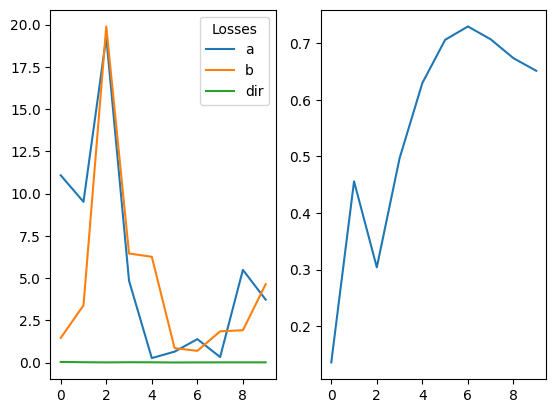

[[0.11 0.14 0.34 0.32]
 [0.15 0.46 0.15 0.26]
 [0.16 0.3  0.18 0.45]
 [0.15 0.5  0.07 0.33]
 [0.14 0.63 0.04 0.23]
 [0.15 0.71 0.03 0.16]
 [0.16 0.73 0.03 0.15]
 [0.18 0.71 0.04 0.15]
 [0.16 0.67 0.04 0.17]
 [0.18 0.65 0.04 0.17]]


In [38]:
points  = []
surface = network.nerfs.ParametricSurface(p,c,r, surface_type)
predictions = debugging_dict["predictions"]

trajectory     = debugging_dict["trajectory"]
gradients_norm = debugging_dict["gradients_norm"]

for i in range(1000):
    a, b = torch.rand(2)
    #point = surface_parametric(a, b, p.detach().numpy(), c, r, surface_type) 
    point = surface.parametrize(a, b)
    points.append(point.detach().numpy())
points = np.vstack(points)

import open3d as o3d
from utils.scripts.archive.scene_loading_2 import get_highlighed_o3d_locations
from utils.scripts.interest_heuristic_0    import get_o3d_pcd_from_coordinates

full_labeled_pcd = analyze_queried_locations(draw_o3d=False)[0]
training_pcd     = full_labeled_pcd
# training_pcd       = get_o3d_pcd_from_coordinates(locs_array[:,:3], colors=[1, 0.5, 0])
# good_pcd           = get_o3d_pcd_from_coordinates(good_points, colors=[0,1, 0])
# bad_pcd           = get_o3d_pcd_from_coordinates(bad_points, colors=[1, 0, 0])
full_pcd         = get_o3d_pcd_from_coordinates(points, colors=[0,1, 0])
traj_pcd         = get_o3d_pcd_from_coordinates(np.vstack(trajectory), colors=[1,0,0])

start_point = get_highlighed_o3d_locations(trajectory[0], radius=50)[0]

end_point = get_highlighed_o3d_locations(trajectory[-1], radius=50, color=(0,.5,.5))[0]

# o3d.visualization.draw_geometries([training_pcd, good_pcd, bad_pcd])
o3d.visualization.draw_geometries([training_pcd, full_pcd, traj_pcd, start_point, end_point])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)

ax[0].plot(np.vstack(gradients_norm)[:,0], label="a")
ax[0].plot(np.vstack(gradients_norm)[:,1], label="b")
ax[0].plot(np.vstack(gradients_norm)[:,2], label="dir")
ax[0].legend(title="Losses")
ax[1].plot(np.vstack(predictions)[:,1], label="water prediction")
plt.show()

print(np.vstack(predictions).round(2))

# Others

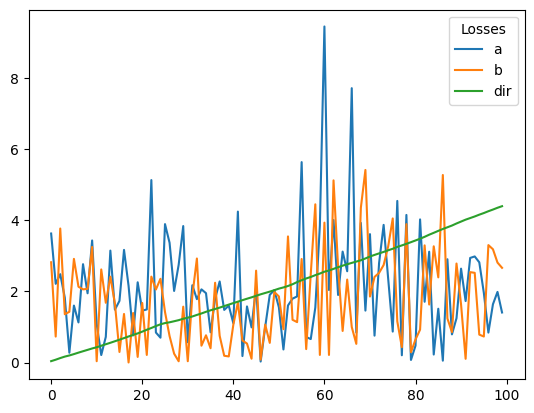

In [27]:
import matplotlib.pyplot as plt

plt.plot(np.vstack(gradients_norm)[:,0], label="a")
plt.plot(np.vstack(gradients_norm)[:,1], label="b")
plt.plot(np.vstack(gradients_norm)[:,2], label="dir")
plt.legend(title="Losses")

Check / Run the following `from utils.scripts.dev_experiments import parametrized_surfaces`
for a demo of the four surfaces.


1. lp - paramters - locations drawn from parameter space - a, b in [0, 1]
2. lr - locations from surface corresppoding to lp / ab

In [5]:
trained_encoder_old, info_dict = initialize_trained_encoder()
mock_location = torch.hstack([rp, rv]).detach().numpy().tolist()
sample_batch = intialize_input_as_tensor(mock_location, [0,0,0,0], info_dict)
input_pos = torch.autograd.Variable(sample_batch["input_pos_raw"], requires_grad=True)
input_dir = sample_batch["input_dir_raw"]
output = trained_encoder_old(input_pos, input_dir, from_raw=True)

mock_location, output

([4.303650379180908,
  109.85212707519531,
  143.2198028564453,
  170.35742488462282,
  4.10353935883233,
  -179.30343161194511],
 tensor([[-0.7306, -1.0000, -0.9792,  0.7082]], grad_fn=<TanhBackward0>))

# correct approach

Normalization __after__ parametrization:

Inputs of NN need to be normalized, not the surface itself.

## Conclusion: 

Dataloader needs to output [a, b] and normalization parameters.

Both projection and normalization need to happen in the Network / differentiable tracked.

# Dummy variables `a,b,p,c,`

In [30]:
from utils.gradient_walk_utils import *
norm_min, norm_dev = 2, 8

a, b = torch.rand(2); print("ab:", a, b); lp = torch.tensor([a,b], requires_grad=True); print("lp:", lp)
p, c = torch.ones(3) * 2, torch.ones(3) * 10; r=torch.tensor(2.) #[2,2,2],[10,10,10]#

lr = surface_parametric(a, b, p, c, r, "square")#; print("lr:", lr)
lr = (lr - norm_min) / norm_dev; print("final point:", lr)

ab: tensor(0.8696) tensor(0.5291)
lp: tensor([0.8696, 0.5291], requires_grad=True)
final point: tensor([ 0.1303,  0.1714, -0.3017], dtype=torch.float64,
       grad_fn=<DivBackward0>)


Normalization __before__ parametrization:

In [29]:
from utils.gradient_walk_utils import *
norm_min, norm_dev = 2, 8

a, b = torch.rand(2); print("ab:", a, b); lp = torch.tensor([a,b], requires_grad=True); print("lp:", lp)
p, c = torch.ones(3) * 2, torch.ones(3) * 10; r=torch.tensor(2) #[2,2,2],[10,10,10]#
p, c = (p - norm_min) / norm_dev, (c - norm_min) / norm_dev 

lr = surface_parametric(a, b, p, c, r, "square"); print("final point:", lr)

ab: tensor(0.0143) tensor(0.2931)
lp: tensor([0.0143, 0.2931], requires_grad=True)
final point: tensor([-0.4158, -2.7569,  3.1728], dtype=torch.float64,
       grad_fn=<AddBackward0>)


# Visualization of Standard shapes above city.

In [153]:
from utils.gradient_walk_utils import *

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
targets_array = (np.vstack((vis_df["f_xyz"]))).tolist()
    
trained_encoder, info_dict = initialize_trained_encoder()
norm_params     = (info_dict["xyz_centroid"], info_dict["xyz_max-min"], info_dict["xyzh_centroid"], info_dict["xyzh_max-min"])
    
# intialize_input_as_tensor(p, c, info_dict)

norm_params
# c = torch.tensor(locs_array[1][:3]) + torch.ones(3) * .1

p = torch.tensor(locs_array.mean(axis=0)[:3]) + torch.tensor([.01, 50, .01]); r=2000; surface_type="circle"
# p = torch.tensor(locs_array.mean(axis=0)[:3]) - torch.tensor([.01, 2000, .01]); r=3200; surface_type="sphere"
p = torch.tensor(locs_array.mean(axis=0)[:3]) - torch.tensor([.01, 500, .01]); r=2000; surface_type="sphere"
p = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300]); r=(3500, -2500); surface_type="square"


# p = torch.tensor(locs_array[0][:3])
c = p - torch.tensor([.01, 50, .01])

# surface_parametric(1,1,[592,51,104],c,100)
surface_parametric(1,1,c,p,r,surface_type)

import open3d as o3d
from utils.scripts.archive.scene_loading_2 import get_highlighed_o3d_locations
from utils.scripts.interest_heuristic_0    import get_o3d_pcd_from_coordinates

n_points = 10000
points_on_circle = [surface_parametric(torch.rand(1, requires_grad=True)\
                                      , torch.rand(1, requires_grad=True)\
                                      , p, c, r, surface_type) for i in range(n_points)]

points_on_circle = torch.vstack(points_on_circle).detach().numpy()

print("Points within bounds: ", ((points_on_circle < locs_array.max(axis=0)[:3]).all(axis=1) \
 & (points_on_circle > locs_array.min(axis=0)[:3]).all(axis=1)).sum(), " out of ", n_points)
# print("Point on the circle:", point_on_circle)
# locs_array    = vis_df.values[:,:3].astype(float)

locs_array
training_pcd       = get_o3d_pcd_from_coordinates(locs_array[:,:3], colors=[1, 0.5, 0])
points_on_circ_pcd = get_o3d_pcd_from_coordinates(points_on_circle, colors = [.05,.5,.75])

o3d.visualization.draw_geometries([training_pcd, points_on_circ_pcd])

Points within bounds:  7453  out of  10000
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


# Visual Check if points are within bounds or not:

In [155]:
# nerfs = NeRFS(norm_params, 6)

from utils.gradient_walk_utils import *
# set_seed(1)

vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())
targets_array      = (np.vstack((vis_df["f_xyz"]))).tolist()   
trained_encoder, info_dict = initialize_trained_encoder()
norm_params        = (info_dict["xyz_centroid"], info_dict["xyz_max-min"], info_dict["xyzh_centroid"], info_dict["xyzh_max-min"])
p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300]); r=(3500, -2500); surface_type="square"
c                  = p - torch.tensor([.01, 50, .01])

trained_encoder = NeRFS(p, c, r, norm_params, surface_type=surface_type, pos_dim=info_dict["enc_input_size"], output_dim=info_dict["num_present_classes"]\
    ,  view_dir_dim=info_dict["enc_input_size"], feat_dim=256)

trained_encoder.load_state_dict(torch.load(f"./utils/assets/models/encoder_350.pt"))

conds = []
good_points = []
bad_points = []

for i in range(10000):
    a, b = torch.rand(2)#; print("ab:", a, b)
    #, (trained_encoder(a,b, a).detach().numpy() < locs_array.max(axis=0)[:3]).all()\
    #trained_encoder(a,b, a)\
    point = trained_encoder(a,b, a).detach().numpy()
    cond = ((point < locs_array.max(axis=0)[:3]) & (point > locs_array.min(axis=0)[:3])).sum() > 2
    if cond:
        good_points.append(point)
    else:
        bad_points.append(point)
    conds.append(cond)
    
bad_points = np.vstack(bad_points)
good_points = np.vstack(good_points)
print("Points within bounds:", sum(conds)   )
import open3d as o3d
from utils.scripts.archive.scene_loading_2 import get_highlighed_o3d_locations
from utils.scripts.interest_heuristic_0    import get_o3d_pcd_from_coordinates


training_pcd       = get_o3d_pcd_from_coordinates(locs_array[:,:3], colors=[1, 0.5, 0])
good_pcd           = get_o3d_pcd_from_coordinates(good_points, colors=[0,1, 0])
bad_pcd           = get_o3d_pcd_from_coordinates(bad_points, colors=[1, 0, 0])


o3d.visualization.draw_geometries([training_pcd, good_pcd, bad_pcd])



Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]
Points within bounds: 7432
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [13]:

from torch.utils.data import Dataset
from utils.scripts.architectures.torch_nerf_src import network
    

a, b = torch.rand(2); print("ab:", a, b); lp = torch.tensor([a,b], requires_grad=True); print("lp:", lp)
p, c = torch.ones(3) * 2, torch.ones(3) * 10; r=torch.tensor([2., 2.]) #[2,2,2],[10,10,10]#

lr = surface_parametric(a, b, p, c, r, "square")#; print("lr:", lr)
lr = (lr - torch.tensor(norm_params[0])) / torch.tensor(norm_params[1]); print("final point:", lr)
    
param_ds = network.nerfs.EncoderNeRFSDataset(a, b, p, c, r, "square", norm_params)
# sample_batch = torch.utils.data.DataLoader(dataset=param_ds).sampler.data_source[:1]
sample_batch = param_ds[0]
sample_batch

ab: tensor(0.1792) tensor(0.7918)
lp: tensor([0.1792, 0.7918], requires_grad=True)
final point: tensor([-0.4683, -0.0195, -0.3530], dtype=torch.float64,
       grad_fn=<DivBackward0>)


{'a': tensor(0.1792, requires_grad=True),
 'b': tensor(0.7918, requires_grad=True),
 'p': tensor([2., 2., 2.], requires_grad=True),
 'c': tensor([10., 10., 10.], requires_grad=True),
 'r': tensor([2., 2.], requires_grad=True),
 'surface_type': 'square',
 'norm_params': (array([1406.54009895,   61.762011  , 1061.20413751]),
  3001.246931488514,
  array([ 22.43477189,  37.63691096, -15.5006524 ]),
  359.99998089890255)}

# Test normalization in Torch model is same as in legacy implementation

In [48]:

from torch.utils.data import Dataset
from utils.scripts.architectures.torch_nerf_src import network
  
trained_encoder, info_dict = initialize_trained_encoder()
norm_params        = (torch.tensor(info_dict["xyz_centroid"], requires_grad=True)\
                      , torch.tensor(info_dict["xyz_max-min"], requires_grad=True)\
                     , torch.tensor(info_dict["xyzh_centroid"], requires_grad=True)\
                    , torch.tensor(info_dict["xyzh_max-min"], requires_grad=True))

for i in range(1000):    

    a, b = torch.rand(2)  
    p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
    r                  = torch.tensor([3500., -2500.]); surface_type="square"
    c                  = p - torch.tensor([.01, 50, .01])
    view_dir           = torch.tensor(locs_array[0][3:], requires_grad=True)
    param_ds = network.nerfs.EncoderNeRFSDataset(a, b, p, c, r, view_dir, "square", norm_params)

    # sample_batch = torch.utils.data.DataLoader(dataset=param_ds).sampler.data_source[:1]
    sample_batch = param_ds[0]
    sample_batch


    trained_encoder = NeRFS(p, c, r, norm_params, surface_type=surface_type, pos_dim=info_dict["enc_input_size"], output_dim=info_dict["num_present_classes"]\
        ,  view_dir_dim=info_dict["enc_input_size"], feat_dim=256)


    trained_encoder.load_state_dict(torch.load(f"./utils/assets/models/encoder_350.pt"))

    # here trained_encoder was just returning the xyz location and its normalization.
    pos, norm_pos = trained_encoder(sample_batch["a"], sample_batch["b"], sample_batch["view_dir"])
 
    stop = np.isclose(norm_pos.detach().numpy(), (intialize_input_as_tensor(pos.detach().numpy().tolist()+[1,1,1], [0,0,0,0], info_dict)["input_pos_raw"]).detach().numpy())
    if not(stop.all()):
        print(i, stop)
        break

# NerFS and Parmateric surface classes - moved to:

`utils.scripts.architectures.torch_nerf_src.network.nerfs.py`

In [2]:
from utils.geometry_utils import surface_parametric
from utils.scripts.architectures.torch_nerf_src import signal_encoder
import torch.nn as nn
class NeRFS(nn.Module):
    """
    NeRFS - NeRF on a surface with parametric imputs.
    A multi-layer perceptron (MLP) used for learning neural radiance fields.

    For architecture details, please refer to 'NeRF: Representing Scenes as
    Neural Radiance Fields for View Synthesis (ECCV 2020, Best paper honorable mention)'.

    Attributes:
        pos_dim (int): Dimensionality of coordinate vectors of sample points.
        view_dir_dim (int): Dimensionality of view direction vectors.
        feat_dim (int): Dimensionality of feature vector within forward propagation.
    """

    def __init__(
        self,
        p,
        c,
        r,
        norm_params: tuple,
        pos_dim: int,
        output_dim: int = 3,
        view_dir_dim: int = 3,
        feat_dim: int = 256,
        surface_type: str = "square"
    ):
        """
        Constructor of class 'NeRF'.

        Args:
            pos_dim (int): Dimensionality of coordinate vectors of sample points.
            view_dir_dim (int): Dimensionality of view direction vectors.
            feat_dim (int): Dimensionality of feature vector within forward propagation.
                Set to 256 by default following the paper.
        """
        super().__init__()

        # rgb_dim = 3
        rgb_dim = output_dim
        self.output_dim = output_dim
        density_dim = 1

        self._pos_dim = pos_dim
        self._view_dir_dim = view_dir_dim
        self._feat_dim = feat_dim

        # fully-connected layers
        self.fc_in = nn.Linear(self._pos_dim, self._feat_dim)
        self.fc_1 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_2 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_3 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_4 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_5 = nn.Linear(self._feat_dim + self._pos_dim, self._feat_dim)
        self.fc_6 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_7 = nn.Linear(self._feat_dim, self._feat_dim)
        self.fc_8 = nn.Linear(self._feat_dim, self._feat_dim + density_dim)
        self.fc_9 = nn.Linear(self._feat_dim + self._view_dir_dim, self._feat_dim // 2)
        self.fc_out = nn.Linear(self._feat_dim // 2, rgb_dim)

        # activation layer
        self.relu_actvn = nn.ReLU()
        # self.sigmoid_actvn = nn.Sigmoid()
        self.sigmoid_actvn = nn.Tanh()

        #Hardcoded positional_encoder
        self.positional_encoder  = signal_encoder.positional_encoder.PositionalEncoder(pos_dim + view_dir_dim, 10, False)#, return_raw=return_raw)

        self.surface_type = surface_type
        self.norm_params  = norm_params
        self.p = p
        self.c = c
        self.r = r
        #self.surface_parametric = surface_parametric
        self.surface = ParametricSurface(self.p,self.c,self.r,self.surface_type)
        
    def forward(
        self,
        a: torch.Tensor,
        b: torch.Tensor,
        view_dir: torch.Tensor,
        on_surface: torch.Tensor=torch.empty(0)
    ) -> torch.Tensor:
        """
        Predicts color and density.

        Given sample point coordinates and view directions,
        predict the corresponding radiance (RGB) and density (sigma).

        Args:
            pos (torch.Tensor): 

        Returns:
            sigma (torch.Tensor): Tensor of shape (N, ).
        """
        
        #raw_pos = surface_parametric(a, b, self.p, self.c, self.r, self.surface_type) 
        raw_pos = self.surface.parametrize(a,b)
        raw_view = view_dir
        #print(pos.dtype)
        
        #1. Normalize position and direction
        
        norm_pos = (raw_pos - self.norm_params[0]) / self.norm_params[1]
        pos      = norm_pos.unsqueeze(0)
        view_dir = (view_dir - self.norm_params[2]) / self.norm_params[3]
        view_dir = view_dir.unsqueeze(0)
        
        #print("Normalized inputs:", pos, view_dir)
        input_matrix = torch.vstack([pos[:, 0], pos[:, 1], pos[:, 2]\
                         , view_dir[:, 0], view_dir[:, 1], view_dir[:, 2]]).T
        
        encoded_input = self.positional_encoder.encode((input_matrix))

        pos          = encoded_input[:,:encoded_input.shape[1]//2]
        view_dir     = encoded_input[:,encoded_input.shape[1]//2:]    
        #print(pos.dtype)
        #print("Encoded inputs:", pos, view_dir)


        x = self.relu_actvn(self.fc_in(pos))
        x = self.relu_actvn(self.fc_1(x))
        x = self.relu_actvn(self.fc_2(x))
        x = self.relu_actvn(self.fc_3(x))
        x = self.relu_actvn(self.fc_4(x))

        x = torch.cat([pos, x], dim=-1)

        x = self.relu_actvn(self.fc_5(x))
        x = self.relu_actvn(self.fc_6(x))
        x = self.relu_actvn(self.fc_7(x))
        x = self.fc_8(x)

        #sigma = self.relu_actvn(x[:, 0])
        x = torch.cat([x[:, 1:], view_dir], dim=-1)

        x = self.relu_actvn(self.fc_9(x))
        rgb = self.sigmoid_actvn(self.fc_out(x))

        #return rgb
        return raw_pos, raw_view, rgb
        #return sigma, rgb

import torch


class ParametricSurface:
    """
    Base class for Parametric Surfaces.
    """

    def __init__(self, p, c, r, surface_type):
        self.p            = p#torch.tensor(p)
        self.c            = c#torch.tensor(c)
        self.r            = r#torch.tensor(r)
        self.surface_type = surface_type
        
        pc      = c - p
        
        pc_norm = torch.norm(pc)
        pc      = pc / pc_norm
        self.pc = pc
        orient  = torch.tensor([1,1, (- pc[0] - pc[1]) / pc[2]])
        self.orient  = orient / torch.norm(orient)

        # Normalize pc to get the direction
        self.pc_normalized = pc / pc_norm

        # Find a vector perpendicular to pc
        self.v_perpendicular = torch.cross(self.pc_normalized, self.orient)

        # Normalize v_perpendicular
        self.v_perpendicular_normalized = self.v_perpendicular / torch.norm(self.v_perpendicular)

    def parametrize(self, a: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
        #p,c,r,surface_type = self.p,self.c,self.r,self.surface_type
    
        
        l, L = self.r
        a    = l * a#  * 2
        b    = L * b#  * 2 

        square_point = self.p + a * self.v_perpendicular_normalized + b * self.orient 
        final_point  = square_point
        return final_point

# ParametricSurface(p,c,r,surface_type).parametrize(a,b)

# Gradient Walk over surface method:

In [3]:
def gradient_walk_on_surface(parameters, view_dir, desired_target, surface_basis, surface_type, intervals=np.ones(4) * .1, n_steps=10, loss_threshold=0.1, debugging_return=True, verbose=True):
    ''' 
    parameters - (init_a, init_b)
    desired_target
    
    returns either
        raw_pos, perc_pred
    or if debugging_return:
        raw_pos, deb_dict
    '''
    #Intial parameters
    init_a, init_b = parameters
    p, c, r        = surface_basis
    #0. Load trained model
    #TODO: pcr to be mixed in a single paramters variable.
    trained_encoder, info_dict = initialize_trained_encoder()
    norm_params                = (torch.tensor(info_dict["xyz_centroid"]), torch.tensor(info_dict["xyz_max-min"]), torch.tensor(info_dict["xyzh_centroid"]), torch.tensor(info_dict["xyzh_max-min"]))
    trained_encoder            = network.nerfs.NeRFS(p, c, r, norm_params, surface_type=surface_type, pos_dim=info_dict["enc_input_size"], output_dim=info_dict["num_present_classes"],  view_dir_dim=info_dict["enc_input_size"])
    trained_encoder.load_state_dict(torch.load(f"./utils/assets/models/encoder_350.pt"))
    criterion                  = torch.nn.MSELoss(reduction='none')
    
    #0. Load data to torch dataset
    #TODO: remove pcr from dataset condructor and surface_type
    param_ds     = network.nerfs.EncoderNeRFSDataset(init_a, init_b, p, c, r, view_dir, desired_target, "square", norm_params)
    sample_batch = param_ds[0]
    input_a, input_b, input_dir = sample_batch["a"], sample_batch["b"], sample_batch["view_dir"]
    lrate      = 5*1e-2
    optimizer  = torch.optim.Adam(params=[input_a, input_b, view_dir], lr=lrate)
    
    gradients_norm  = []; predictions = []; trajectory = []; loss_trajectory = []; inputs = []
    parsing_bar     = tqdm(range(n_steps))
    
    for i in parsing_bar:

        inputs.append((input_a.detach().numpy().tolist(), input_b.detach().numpy().tolist(), input_dir.detach().numpy().tolist()))
        ##### a. Predict output distribution
        raw_pos, raw_view, output     = trained_encoder(input_a, input_b, input_dir)
        prediction = (output.detach().numpy()); labels = sample_batch["output"]
        
        perc_pred         = (prediction[0] + 1) / 2
        predictions.append(perc_pred)
        trajectory.append((raw_pos.detach().numpy()))

        #Adaptive labels to interval:
        if intervals is not None:
            interval_target = interval_desired_target_loss(prediction, labels.numpy(), intervals)
            labels          = interval_target

        ##### b. Compute loss
        loss      = criterion(output,labels)

        ##### c. Gradient step using optimizer:
        optimizer.zero_grad()
        loss.mean().backward(retain_graph=True)
        #loss.mean().backward()
        a_grad, b_grad, dir_grad = input_a.grad, input_b.grad, input_dir.grad
        optimizer.step()
        if not((0 < input_a.item() < 1) and (0 < input_b.item() < 1)):
            break

        ##### d. Log found gradients and predictions as percentages
        loss_trajectory.append(loss.detach().numpy())

        pos_grad_norm     = (np.linalg.norm(a_grad), np.linalg.norm(b_grad), np.linalg.norm(dir_grad))
        gradients_norm.append(pos_grad_norm)
        
        if verbose:
            parsing_bar.set_description(f"Gradient norm: a {pos_grad_norm[0]:.4f}, b {pos_grad_norm[1]:.4f}, dir {pos_grad_norm[2]:.4f}")

        if loss.mean() < loss_threshold:
            break
            
    desired_percentages = (sample_batch["output"] + 1) / 2
    actual_percentages  = torch.Tensor(predictions[-1])
    # if MSE residual:
    final_residual = criterion(desired_percentages, actual_percentages).mean().detach().item()
    # # if RMSE residual:
    # final_residual = torch.sqrt(criterion(desired_percentages, actual_percentages)).mean().detach().item()
    #print(final_residual, desired_percentages, actual_percentages.detach().numpy().round(2))
    
    raw_pos = trajectory[-1]
    if debugging_return:
        debugging_dict = {"final_residual":final_residual, "trajectory":trajectory, "predictions":predictions, "gradients_norm":gradients_norm, "loss_trajectory":loss_trajectory, "inputs":inputs}
        return raw_pos, debugging_dict
    else:
        return raw_pos, perc_pred
    
    
from torch.utils.data import Dataset
from utils.scripts.architectures.torch_nerf_src import network
  

p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
r                  = torch.tensor([3500., -2500.]); surface_type="square"
c                  = p - torch.tensor([.01, 50, .01])
view_dir           = torch.tensor(locs_array[0][3:], requires_grad=True)
desired_target     = torch.tensor([0,1,0,0]).to(torch.float32)

a, b               = torch.rand(2)  
parameters         = (a, b)
surface_basis      = (p,c,r)

raw_pos, perc_pred = gradient_walk_on_surface(parameters, view_dir, desired_target, surface_basis, surface_type\
             , intervals=np.ones(4) * .1, n_steps=10, loss_threshold=0.1, debugging_return=False, verbose=True)

raw_pos, perc_pred 


Gradient norm: a 2.3300, b 1.7458, dir 0.0302: 100%|██████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 204.57it/s]


(array([166.94180109, 109.72347578, 623.82662149]),
 array([1.5235415e-01, 8.6426735e-07, 1.0934025e-02, 8.0666673e-01],
       dtype=float32))

In [54]:

from torch.utils.data import Dataset
from utils.scripts.architectures.torch_nerf_src import network
  
trained_encoder, info_dict = initialize_trained_encoder()
norm_params        = (torch.tensor(info_dict["xyz_centroid"])\
                      , torch.tensor(info_dict["xyz_max-min"])\
                     , torch.tensor(info_dict["xyzh_centroid"])\
                    , torch.tensor(info_dict["xyzh_max-min"]))



p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
# p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 0, -300])
# p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 50, -300])
# r                  = torch.tensor([3000., -2000.]); surface_type="square"
r                  = torch.tensor([3500., -2500.]); surface_type="square"
c                  = p - torch.tensor([.01, 50, .01])
view_dir           = torch.tensor(locs_array[0][3:], requires_grad=True)

# desired_target            = torch.tensor([0,0,1,0]).to(torch.float32)
# desired_target            = torch.tensor([0,.5,.5,0]).to(torch.float32)
desired_target            = torch.tensor([0,1,0,0]).to(torch.float32)

init_a, init_b     = torch.rand(2)  
param_ds = network.nerfs.EncoderNeRFSDataset(init_a, init_b, p, c, r, view_dir, desired_target, "square", norm_params)
# print(p,c,r)
# print()
# sample_batch = torch.utils.data.DataLoader(dataset=param_ds).sampler.data_source[:1]
sample_batch = param_ds[0]
sample_batch


trained_encoder = network.nerfs.NeRFS(p, c, r, norm_params, surface_type=surface_type, pos_dim=info_dict["enc_input_size"], output_dim=info_dict["num_present_classes"]\
    ,  view_dir_dim=info_dict["enc_input_size"], feat_dim=256)
# print(trained_encoder.surface.p, trained_encoder.surface.c, trained_encoder.surface.r)

# print()
# print(p,c,r)

trained_encoder.load_state_dict(torch.load(f"./utils/assets/models/encoder_350.pt"))
 
#rp, rv, pr = trained_encoder(sample_batch["a"], sample_batch["b"], sample_batch["view_dir"])
# stop = np.isclose(norm_pos.detach().numpy(), (intialize_input_as_tensor(pos.detach().numpy().tolist()+[1,1,1], [0,0,0,0], info_dict)["input_pos_raw"]).detach().numpy())
#rp, rv, pr

criterion       = torch.nn.MSELoss(reduction='none')
gradients_norm  = []
predictions     = []
trajectory      = []
loss_trajectory = []
inputs = []
n_steps         = 100
parsing_bar     = tqdm(range(n_steps))
intervals       = np.ones(4) * .1#np.ones(4) * .2

input_a, input_b, input_dir = sample_batch["a"], sample_batch["b"], sample_batch["view_dir"]
lrate      = 5*1e-2#.05#1e-2#.05 #1e-2
# optimizer  = torch.optim.Adam(params=[input_b, input_dir], lr=lrate)
# optimizer  = torch.optim.Adam(params=[input_a, input_dir], lr=lrate)
optimizer  = torch.optim.Adam(params=[input_a, input_b, view_dir], lr=lrate)
# optimizer  = torch.optim.RMSprop(params=[input_a, input_b, view_dir], lr=lrate)
# scheduler  = torch.optim.lr_scheduler.LinearLR(optimizer)
# optimizer  = torch.optim.Adam(params=[input_a, input_b], lr=lrate)
loss_threshold =.1

for i in parsing_bar:

    inputs.append((input_a.detach().numpy().tolist(), input_b.detach().numpy().tolist(), input_dir.detach().numpy().tolist()))
    ##### a. Predict output distribution
    raw_pos, raw_view, output     = trained_encoder(input_a, input_b, input_dir)
    #trajectory.append(raw_pos.detach().numpy().tolist())
    #output     = trained_encoder(input_pos, input_dir, from_raw=True)
    prediction = (output.detach().numpy())
    labels     = sample_batch["output"]
    
    trajectory.append(raw_pos.detach().numpy())
    perc_pred         = (prediction[0] + 1) / 2
    predictions.append(perc_pred)

    #Adaptive labels to interval:
    if intervals is not None:
        interval_target = interval_desired_target_loss(prediction, labels.numpy(), intervals)
        #print(np.round(prediction, 2), np.round(labels, 2), np.round(interval_target, 2))
        labels          = interval_target
        # print(labels, interval_target)

    ##### b. Compute loss
    loss      = criterion(output,labels)

    ##### c. Gradient step using optimizer:
    optimizer.zero_grad()
    #loss.mean().backward()
    loss.mean().backward(retain_graph=True)
#     loss.mean().backward()
    #pos_grad, dir_grad = input_pos.grad, input_dir.grad
    a_grad, b_grad, dir_grad = input_a.grad, input_b.grad, input_dir.grad
    #print(input_a, input_b, p,c)
    #print(trained_encoder.surface.p, trained_encoder.surface.c, trained_encoder.surface.r);print()
    #print(p,c,r)
    optimizer.step()
#     input_a = input_a.clamp(0,1); input_b = input_b.clamp(0,1)
#     if i % (n_steps//5) == 1:
#         scheduler.step()
    #print(input_a, input_b,p,c)
    #print(trained_encoder.surface.p, trained_encoder.surface.c, trained_encoder.surface.r)
    #print(p,c,r)
#     break

    ##### d. Log found gradients and predictions
    loss_trajectory.append(loss.detach().numpy())

    pos_grad_norm     = (np.linalg.norm(a_grad), np.linalg.norm(b_grad), np.linalg.norm(dir_grad))
    gradients_norm.append(pos_grad_norm)


    #if verbose:
    parsing_bar.set_description(f"Gradient norm: a {pos_grad_norm[0]:.4f}, b {pos_grad_norm[1]:.4f}, dir {pos_grad_norm[2]:.4f}")

    ##### add location to trajectory
    #scaled_loc = rescale_from_norm_params(input_pos.detach().numpy()[0], info_dict["xyz_centroid"], info_dict["xyz_max-min"])
    #scaled_dir = rescale_from_norm_params(input_dir.detach().numpy()[0], info_dict["xyzh_centroid"], info_dict["xyzh_max-min"])

    #actual_loc = np.hstack([p.detach().numpy(), view_dir.detach().numpy()])
    #actual_loc = input_pos.detach().numpy()[0]
    #trajectory.append(actual_loc)
    #trajectory.append(actual_loc.tolist())
#     input_a = torch.max(torch.tensor(0), input_a)
#     input_a = torch.min(torch.tensor(1), input_b)
#     input_b = torch.max(torch.tensor(0), input_b)
#     input_b = torch.min(torch.tensor(1), input_b)

    if loss.mean() < loss_threshold:
        break
final_residual = 0
# print(sample_batch["output"].detach().numpy()[0], desired_target, predictions[-1])
desired_percentages = (sample_batch["output"] + 1) / 2
actual_percentages  = torch.Tensor(predictions[-1])
# if MSE residual:
final_residual = criterion(desired_percentages, actual_percentages).mean().detach().item()
# # if RMSE residual:
# final_residual = torch.sqrt(criterion(desired_percentages, actual_percentages)).mean().detach().item()

print(final_residual, desired_percentages, actual_percentages.detach().numpy().round(2))
# performed_steps = i
# if debugging_return:
#     return actual_loc, perc_pred, trajectory, gradients_norm, predictions, loss_trajectory, performed_steps, final_residual

# return actual_loc, perc_pred

Gradient norm: a 11.8134, b 1.8620, dir 0.1015: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 328.41it/s]


0.2492370903491974 tensor([0., 1., 0., 0.]) [0.02 0.24 0.06 0.64]


# Analysis of returned location

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


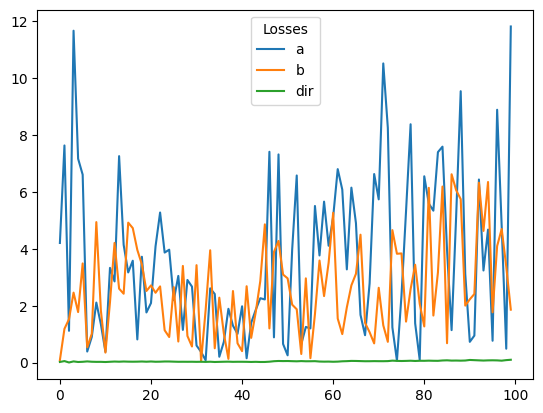

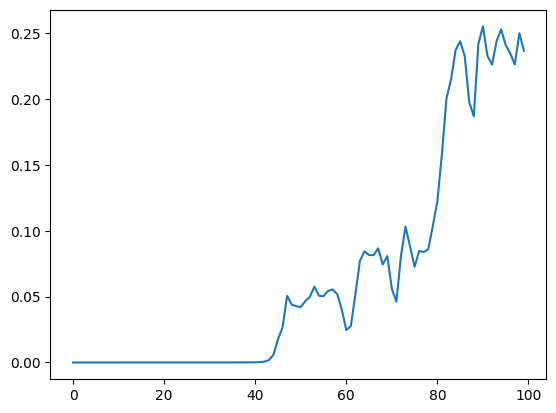

[[0.12 0.   0.02 0.83]
 [0.13 0.   0.01 0.83]
 [0.12 0.   0.02 0.82]
 [0.11 0.   0.03 0.82]
 [0.12 0.   0.06 0.78]
 [0.04 0.04 0.11 0.77]
 [0.06 0.02 0.16 0.71]
 [0.05 0.06 0.16 0.69]
 [0.04 0.12 0.12 0.71]
 [0.02 0.26 0.07 0.69]]


In [55]:

# p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
# r                  = torch.tensor([3500., -2500.]); surface_type="square"
# c                  = p - torch.tensor([.01, 50, .01])
points = []
for i in range(1000):
    a, b = torch.rand(2)#; print("ab:", a, b)
    #, (trained_encoder(a,b, a).detach().numpy() < locs_array.max(axis=0)[:3]).all()\
    #trained_encoder(a,b, a)\
    #point = trained_encoder(a, b, a).detach().numpy()
    point = surface_parametric(a, b, p.detach().numpy(), c, r, surface_type) 
    points.append(point.detach().numpy())
points = np.vstack(points)
#     cond = ((point < locs_array.max(axis=0)[:3]) & (point > locs_array.min(axis=0)[:3])).sum() > 2
#     if cond:
#         good_points.append(point)
#     else:
#         bad_points.append(point)
#     conds.append(cond)
    
# bad_points = np.vstack(bad_points)
# good_points = np.vstack(good_points)
# print("Points within bounds:", sum(conds)   )
import open3d as o3d
from utils.scripts.archive.scene_loading_2 import get_highlighed_o3d_locations
from utils.scripts.interest_heuristic_0    import get_o3d_pcd_from_coordinates


training_pcd       = get_o3d_pcd_from_coordinates(locs_array[:,:3], colors=[1, 0.5, 0])
# good_pcd           = get_o3d_pcd_from_coordinates(good_points, colors=[0,1, 0])
# bad_pcd           = get_o3d_pcd_from_coordinates(bad_points, colors=[1, 0, 0])
full_pcd           = get_o3d_pcd_from_coordinates(points, colors=[0,1, 0])
traj_pcd          = get_o3d_pcd_from_coordinates(np.vstack(trajectory), colors=[1,0,0])

start_point = get_highlighed_o3d_locations(trained_encoder.surface.parametrize(torch.tensor(inputs[0][0])
                                                                               , torch.tensor(inputs[0][1])).detach().numpy(), radius=50)[0]

end_point = get_highlighed_o3d_locations(trained_encoder.surface.parametrize(input_a,input_b).detach().numpy(), radius=50, color=(0,.5,.5))[0]

# o3d.visualization.draw_geometries([training_pcd, good_pcd, bad_pcd])
o3d.visualization.draw_geometries([training_pcd, full_pcd, traj_pcd, start_point, end_point])

import matplotlib.pyplot as plt

plt.plot(np.vstack(gradients_norm)[:,0], label="a")
plt.plot(np.vstack(gradients_norm)[:,1], label="b")
plt.plot(np.vstack(gradients_norm)[:,2], label="dir")
plt.legend(title="Losses")
plt.show()
plt.plot(np.vstack(predictions)[:,1])
plt.show()

print(np.vstack(predictions).round(2)[::10])

# Query multiple locations moved to and adaption of 

the `query_locations` method from `utils.gradient_walk_utils.py`

In [1]:

def query_locations_on_surface(desired_distribution, surface_basis, surface_type, num_locations=10, search_intervals=np.ones(4) * .2, lt=.01, at=10, max_steps = 100, seed=1):
    set_seed(seed)
    
    n_trials  = num_locations * 10
    #Needed just for view_dir intialization
    vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
    locs_array         = vis_df.values[:,:6].astype(float)
    
    ach_locs    = []
    debug_dicts = []

    for i in tqdm(range(n_trials)):
        
        view_dir           = torch.tensor(locs_array[np.random.randint(locs_array.shape[0])][3:], requires_grad=True) # change view_dir to random picking
        a, b               = torch.rand(2) 
        parameters         = (a, b)
        
        raw_pos, debugging_dict = gradient_walk_on_surface(parameters, view_dir, desired_distribution, surface_basis, surface_type\
                 , intervals=search_intervals, n_steps=max_steps, loss_threshold=lt, debugging_return=True, verbose=False)
        
        ach_locs.append(np.hstack([raw_pos, debugging_dict["last_view_dir"]]))
        debug_dicts.append(debugging_dict)
        
        if len(ach_locs) >= num_locations:
            break 
        
    al_df               = pd.DataFrame(data=ach_locs, columns=vis_df.columns.values[:6])#achived locations data frame
    
    al_df["f_xyz"]      = [d["predictions"][-1] for d in debug_dicts]
    al_df["residual"]   = [d["final_residual"] for d in debug_dicts]
    al_df["steps"]      = [len(d["trajectory"]) for d in debug_dicts]
    al_df["start_locs"] = [d["trajectory"][0] for d in debug_dicts]
    
    return al_df



vis_df, normp, _   = process_locations_visibility_data_frame("./utils/assets/test_data/locations_example.csv")  
locs_array         = vis_df.values[:,:6].astype(float)
print("Locs mins and maxs:", locs_array.min(axis=0).round(), locs_array.max(axis=0).round())

p                  = torch.tensor(locs_array.min(axis=0)[:3]) + torch.tensor([-300, 100, -300])
c                  = p - torch.tensor([.01, 50, .01])
r                  = torch.tensor([3500., -2500.])
surface_basis      = (p, c, r); surface_type="square"

desired_distribution = torch.tensor([0,1,0,0]).to(torch.float32)

al_df = query_locations_on_surface(desired_distribution, surface_basis, surface_type, num_locations=10, search_intervals=np.ones(4) * .2, lt=.01, at=10, max_steps = 100)
    
    
    

Locs mins and maxs: [   0.   10.    8. -180.  -90. -180.] [3002.  112. 2171.  180.   90.  180.]
Random seed set as 1


  9%|████████████                                                                                                                          | 9/100 [00:00<00:05, 17.43it/s]


,x,y,z,xh,yh,zh,f_xyz,residual,steps,start_locs
0,3179.183794,109.101175,723.087093,172.184157,-14.080755,177.556125,"[0.14156461, 0.37973633, 0.033387184, 0.43429017]",0.148623,66,"[2352.024930413132, 109.329924358267, 406.5006..."
1,3125.861368,108.888979,1837.393510,-179.711969,-32.832168,-179.655879,"[0.17062116, 0.66834885, 0.030838966, 0.22205997]",0.047341,5,"[2938.233419205298, 108.87251946126665, 2107.3..."
2,-188.611131,109.953615,-171.317596,12.659534,-6.213569,1.450502,"[0.7824762, 1.1920929e-07, 0.000761956, 0.2107...",0.414172,2,"[-13.636148441258998, 109.89361321057885, -46...."
3,944.015094,109.525134,838.461466,-0.367251,15.764150,0.947543,"[0.034044594, 0.4559417, 0.03286317, 0.44048]",0.123065,100,"[1527.3734783116736, 109.36400624872049, 1060...."
4,3027.746269,108.846225,2149.277704,-1.323319,80.999969,1.022138,"[0.1832729, 0.23927197, 0.036827564, 0.5277006]",0.223030,3,"[2704.6568478181503, 108.89978840136989, 2204...."
5,3098.095585,109.112679,746.657491,161.149410,69.468903,-162.177511,"[0.1848836, 0.14483058, 0.03573492, 0.6088046]",0.284354,1,"[3098.0955845122958, 109.11267886332803, 746.6..."
6,496.889778,109.544650,1188.009528,2.202879,60.542303,-5.099040,"[0.0972707, 0.006998807, 0.2037664, 0.48643753]",0.318414,100,"[1223.2680353969515, 109.22998998793398, 2034...."
7,-184.089661,109.910979,37.344456,13.090294,66.409925,-12.259582,"[0.24460956, 9.298325e-06, 0.0071406662, 0.718...",0.394015,3,"[166.06690497715803, 109.87686145078904, -142...."
8,3095.174255,109.204891,288.518174,170.324863,21.800863,-176.496081,"[0.11417198, 0.117868304, 0.038537353, 0.7056696]",0.322662,5,"[2443.7334095977276, 109.29227478497408, 503.0..."
9,3040.565460,109.331651,-290.674026,-7.280800,75.581850,5.195833,"[0.14799216, 0.12125227, 0.049990624, 0.5943638]",0.287467,70,"[2248.9307514172533, 109.48856953019661, -283...."
